In [167]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [168]:
df=pd.read_csv("C:\\Users\\KIIT\\Desktop\\HRC_Project\\Final.csv") #creating and loading dataset, TASK 1

In [169]:
df.head()  #initital dataset, 

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,20220101,43012,SR02,756141537,"954,61",20220113,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,20220101,43114,NR03,798847812,"787,36",20220111,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,20220101,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,20220101,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,20220101,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400


In [170]:
df.describe() #getting description of dataset, TAKS 2

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


In [171]:
df.shape

(1101925, 16)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

In [173]:
df.nunique()

CUSTOMER_ORDER_ID          1099445
SALES_ORG                     2411
DISTRIBUTION_CHANNEL           243
DIVISION                         2
RELEASED_CREDIT_VALUE        47904
PURCHASE_ORDER_TYPE            350
COMPANY_CODE                    28
ORDER_CREATION_DATE            152
ORDER_CREATION_TIME          80576
CREDIT_CONTROL_AREA              8
SOLD_TO_PARTY              1099377
ORDER_AMOUNT                235152
REQUESTED_DELIVERY_DATE        358
ORDER_CURRENCY                  20
CREDIT_STATUS                    3
CUSTOMER_NUMBER               6748
dtype: int64

In [174]:
dupl=df.duplicated(subset='CUSTOMER_ORDER_ID')
print("Total Duplicate Rows in 'CUSTOMER_ORDER_ID': ",len(df[dupl]))
print(df.shape[0])
print(df["CUSTOMER_ORDER_ID"].nunique())
x=df.shape[0]-df["CUSTOMER_ORDER_ID"].nunique()
print("Duplicacies in CUSTOMER_ORDER_ID: ",x)

Total Duplicate Rows in 'CUSTOMER_ORDER_ID':  2480
1101925
1099445
Duplicacies in CUSTOMER_ORDER_ID:  2480


In [175]:
df.drop_duplicates(subset='CUSTOMER_ORDER_ID', keep=False, inplace=True)
df.head()  #removing duplicacies present in Primary key "CUSTOMER_ORDER_ID"
df.shape[0]-df["CUSTOMER_ORDER_ID"].nunique() 

0

In [176]:
df.isnull().sum()

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18607
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              878494
CUSTOMER_NUMBER                 0
dtype: int64

In [177]:
df.dropna(subset=["PURCHASE_ORDER_TYPE"], inplace=True)

In [178]:
df=df.drop(columns=['CREDIT_STATUS'])

In [179]:
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'], format='%Y%m%d')
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'], format='%Y%m%d')
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,"954,61",2022-01-13,EUR,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,"787,36",2022-01-11,EUR,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,"67493,46",2022-01-12,EUR,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,"1405,54",2022-01-06,EUR,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,"0,00",2022-01-06,EUR,1210351400


In [180]:
df.drop(df[df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']].index,inplace=True)

In [181]:
df.shape

(1051356, 15)

In [182]:
print(df["ORDER_AMOUNT"].str.contains(",").value_counts())
print(df["ORDER_AMOUNT"].str.contains("-").value_counts())
print(df["RELEASED_CREDIT_VALUE"].str.contains(",").value_counts())

True     1049982
False       1374
Name: ORDER_AMOUNT, dtype: int64
False    1051327
True          29
Name: ORDER_AMOUNT, dtype: int64
True     1049982
False       1374
Name: RELEASED_CREDIT_VALUE, dtype: int64


In [183]:
df["ORDER_AMOUNT"] = df["ORDER_AMOUNT"].replace(',', '.', regex=True)
df["ORDER_AMOUNT"] = df["ORDER_AMOUNT"].replace('-', '', regex=True)
df["RELEASED_CREDIT_VALUE"] = df["RELEASED_CREDIT_VALUE"].replace([',','-'], '.', regex=True)

In [184]:
osd_df = df.loc[(df['ORDER_CREATION_DATE'] == df['REQUESTED_DELIVERY_DATE'])]
print("Rows having Same Order and Delivery Date: ",osd_df.shape[0])

Rows having Same Order and Delivery Date:  83637


In [185]:
df['ORDER_CURRENCY'].value_counts() 


USD    617517
EUR    249167
AUD     63318
CAD     54232
GBP     14101
PLN     11804
MYR     10638
AED      7608
HKD      5731
CHF      5203
RON      4705
SGD      3657
CZK      2169
HU1      1374
NZD        68
BHD        30
QAR        12
SAR        12
KWD         6
SEK         4
Name: ORDER_CURRENCY, dtype: int64

In [186]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].astype(float) #firstly converting object type to float value
rates = {'EUR': 1.22,'AED': 0.27,'CHF': 1.11,'CZK': 0.045,'GBP': 1.42,'RON': 0.24,'USD': 1.0,'PLN': 0.26,   
    'HU1': 0.0036,'SAR': 0.27,'BHD': 2.65,'KWD': 3.32,'QAR': 0.27,'SEK': 0.11,'CAD': 0.82,'HKD': 0.13,'AUD': 0.76,   
    'MYR': 0.24,'SGD': 0.74,'NZD': 0.70 }
def convert(amount, currency):
    if currency == 'USD':
        return amount
    elif currency in rates:
        return amount*rates[currency]
    else:
        return None
df['amount_in_usd'] = df.apply(lambda row: convert(row['ORDER_AMOUNT'], row['ORDER_CURRENCY']), axis=1)
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CUSTOMER_NUMBER,amount_in_usd
0,946851639,3537,United States of America,South-Region,0.00,1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,12311807,1164.6242
1,963432061,3449,Martinique,South-Region,0.00,1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,12311807,960.5792
2,971991639,3238,Moldova,South-Region,82342.02,I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,12118758,82342.0212
3,754349803,3911,United Arab Emirates,South-Region,1471.24,N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,1210499770,1714.7588
4,930253442,2381,Greece,South-Region,0.00,N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,1210351400,0.0000


In [187]:
val=(df['amount_in_usd']==0).sum()
print(val)

236249


In [188]:
import random
grp1 = df.groupby(['CUSTOMER_NUMBER', 'COMPANY_CODE'])
def generate_unique_key():
    return random.randint(0, df.shape[0])
df['unique_cust_id'] = grp1['COMPANY_CODE'].transform(lambda x: generate_unique_key())
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,946851639,3537,United States of America,South-Region,0.00,1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,12311807,1164.6242,595722
1,963432061,3449,Martinique,South-Region,0.00,1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,12311807,960.5792,595722
2,971991639,3238,Moldova,South-Region,82342.02,I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,12118758,82342.0212,869094
3,754349803,3911,United Arab Emirates,South-Region,1471.24,N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,1210499770,1714.7588,439138
4,930253442,2381,Greece,South-Region,0.00,N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,1210351400,0.0000,954611


In [189]:
print("Total number of groups:", grp1.ngroups)

Total number of groups: 6625


In [190]:
var1=df["ORDER_CURRENCY"].value_counts()

In [191]:
df["ORDER_CURRENCY"].unique()

array(['EUR', 'CHF', 'CZK', 'GBP', 'RON', 'AED', 'USD', 'PLN', 'HU1',
       'SAR', 'BHD', 'KWD', 'QAR', 'SEK', 'CAD', 'HKD', 'AUD', 'MYR',
       'SGD', 'NZD'], dtype=object)

In [192]:
percentage = df['ORDER_CURRENCY'].value_counts(normalize=True) * 100

In [193]:
print(percentage)

USD    58.735290
EUR    23.699584
AUD     6.022508
CAD     5.158291
GBP     1.341220
PLN     1.122741
MYR     1.011836
AED     0.723637
HKD     0.545106
CHF     0.494885
RON     0.447517
SGD     0.347837
CZK     0.206305
HU1     0.130688
NZD     0.006468
BHD     0.002853
QAR     0.001141
SAR     0.001141
KWD     0.000571
SEK     0.000380
Name: ORDER_CURRENCY, dtype: float64


In [194]:
per=df['ORDER_CURRENCY'].value_counts(normalize=True)*100  #getting % of all unique values
rep=per[per<1].index  #if unique values weightage less than 1%, mark them as others
df["UPDATED_CURRENCY"] = df_pie.apply(lambda x: 'Others' if x in rep else x) 
#creating a temporary column "UPDATED_CURRENCY", we'll delete it later, as of now it will help us to get Pie chart 

In [195]:
curr=df["UPDATED_CURRENCY"].value_counts()

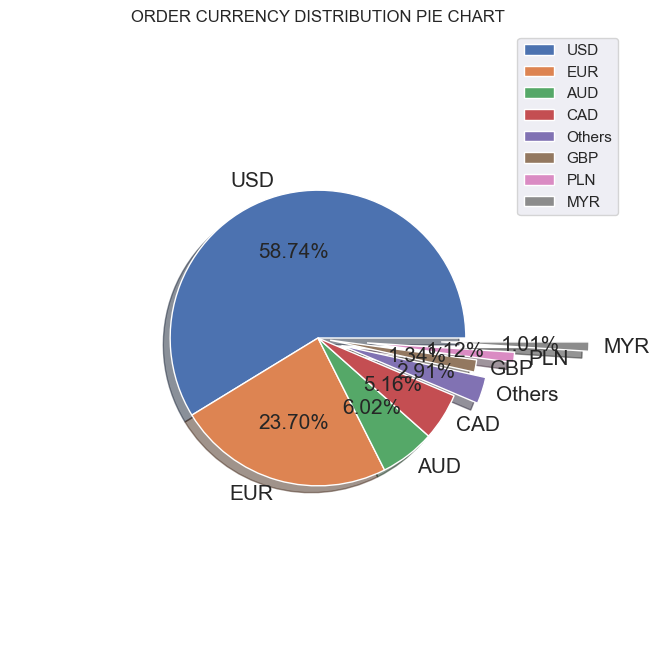

In [196]:
plt.figure(figsize=(16,8))
explode=[0,0,0,0,0.1,0.05,0.2,0.5]
plt.pie(curr,labels=curr.index,autopct='%0.2f%%',shadow=True,radius=0.6,textprops={"fontsize":15},explode=explode)
plt.legend()
plt.title("ORDER CURRENCY DISTRIBUTION PIE CHART")
plt.show()

In [197]:
df['ORDER_MONTH']=df['ORDER_CREATION_DATE'].dt.month
df['ORDER_DAY'] = df['ORDER_CREATION_DATE'].dt.day

In [198]:
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id,UPDATED_CURRENCY,ORDER_MONTH,ORDER_DAY
0,946851639,3537,United States of America,South-Region,0.00,1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,12311807,1164.6242,595722,EUR,1,1
1,963432061,3449,Martinique,South-Region,0.00,1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,12311807,960.5792,595722,EUR,1,1
2,971991639,3238,Moldova,South-Region,82342.02,I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,12118758,82342.0212,869094,EUR,1,1
3,754349803,3911,United Arab Emirates,South-Region,1471.24,N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,1210499770,1714.7588,439138,EUR,1,1
4,930253442,2381,Greece,South-Region,0.00,N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,1210351400,0.0000,954611,EUR,1,1


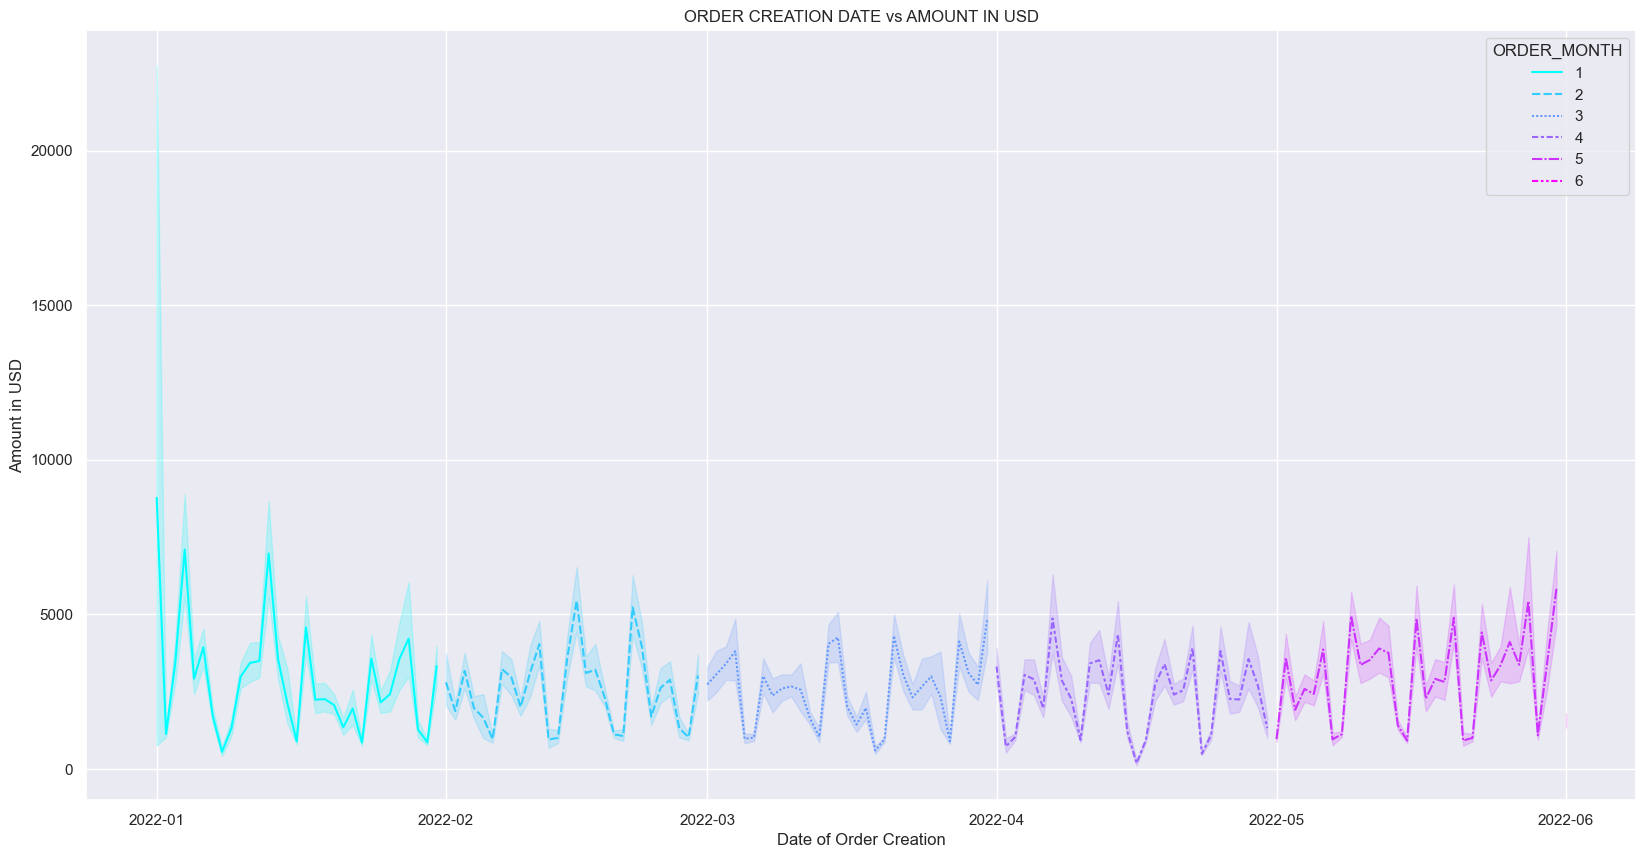

In [199]:
plt.figure(figsize=(20,10))
sns.set(style='darkgrid')
sns.lineplot(x="ORDER_CREATION_DATE",y="amount_in_usd",data=df,hue="ORDER_MONTH",style="ORDER_MONTH",palette="cool")
plt.xlabel("Date of Order Creation")
plt.ylabel("Amount in USD")
plt.title("ORDER CREATION DATE vs AMOUNT IN USD")
plt.show()

In [200]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["DIVISION"] = le.fit_transform(df["DIVISION"])+1
df["CREDIT_CONTROL_AREA"]=le.fit_transform(df["CREDIT_CONTROL_AREA"])+1
df["ORDER_CURRENCY"]=le.fit_transform(df["ORDER_CURRENCY"])+1          
df["COMPANY_CODE"]=le.fit_transform(df["COMPANY_CODE"])+1
df["DISTRIBUTION_CHANNEL"]=le.fit_transform(df["DISTRIBUTION_CHANNEL"])+1
df["PURCHASE_ORDER_TYPE"]=le.fit_transform(df["PURCHASE_ORDER_TYPE"])+1

In [201]:
df["COMPANY_CODE"].unique()

array([12, 14, 15, 20, 17, 18, 26, 11,  3, 19,  1,  6,  2, 10, 16,  5,  4,
       21, 13, 22, 25, 24, 23, 27,  8,  7,  9, 28], dtype=int64)

In [202]:
result_dict = {}
grouped = df.groupby("COMPANY_CODE")
for company_code, group in grouped:
    total_amount = group["ORDER_AMOUNT"].sum()
    result_dict[company_code] = total_amount
print(result_dict)

{1: 38840938.12, 2: 87562098.72, 3: 315512760.91, 4: 2620781759.55, 5: 3574216.9400000004, 6: 151515744.57999998, 7: 117463208.0, 8: 42550314.379999995, 9: 58428245.02000001, 10: 12321913.34, 11: 77651164.34, 12: 221460173.09000003, 13: 8224509.51, 14: 75076071.02000001, 15: 36338892.89, 16: 239953237.83, 17: 97012370.53, 18: 15241544.05, 19: 149030299.92, 20: 14602908.8, 21: 7595093.2700000005, 22: 113797906.56, 23: 5788005.779999999, 24: 511843044.7100002, 25: 436585511.94000006, 26: 332580395.78999996, 27: 80887832.88000001, 28: 134099625.80000001}


In [203]:
l= list(result_dict.keys())  #fetching all keys from created dictionary above
l1= [str(element) for element in l]  #converting keys into String(storing into list),
l1 = list(map(str, l))                       #which was 'int' previously, so that labelling will easy

print(l1)
l2 = list(result_dict.values())
print(l2)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28']
[38840938.12, 87562098.72, 315512760.91, 2620781759.55, 3574216.9400000004, 151515744.57999998, 117463208.0, 42550314.379999995, 58428245.02000001, 12321913.34, 77651164.34, 221460173.09000003, 8224509.51, 75076071.02000001, 36338892.89, 239953237.83, 97012370.53, 15241544.05, 149030299.92, 14602908.8, 7595093.2700000005, 113797906.56, 5788005.779999999, 511843044.7100002, 436585511.94000006, 332580395.78999996, 80887832.88000001, 134099625.80000001]


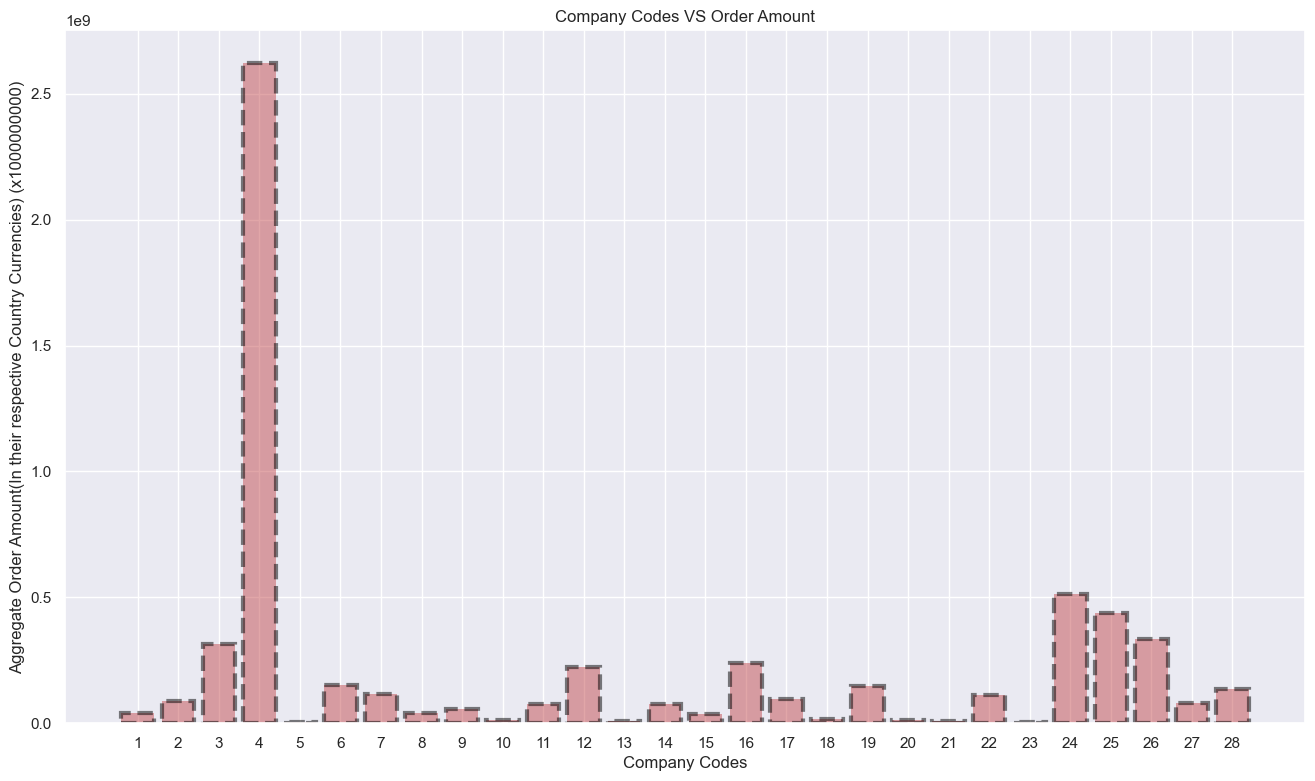

In [204]:
plt.figure(figsize=(16,9))
plt.bar(l1,l2,width=0.8,align="center",color='r',edgecolor='black',linewidth=3,alpha=0.5,linestyle='--')
plt.xlabel("Company Codes")
plt.ylabel("Aggregate Order Amount(In their respective Country Currencies) (x1000000000)")
plt.title("Company Codes VS Order Amount")
plt.show()

In [205]:
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id,UPDATED_CURRENCY,ORDER_MONTH,ORDER_DAY
0,946851639,3537,233,2,0.00,1,12,2022-01-01,43012,6,756141537,954.61,2022-01-13,7,12311807,1164.6242,595722,EUR,1,1
1,963432061,3449,136,2,0.00,1,12,2022-01-01,43114,3,798847812,787.36,2022-01-11,7,12311807,960.5792,595722,EUR,1,1
2,971991639,3238,142,2,82342.02,205,14,2022-01-01,110019,1,960984659,67493.46,2022-01-12,7,12118758,82342.0212,869094,EUR,1,1
3,754349803,3911,229,2,1471.24,256,15,2022-01-01,153013,6,925857642,1405.54,2022-01-06,7,1210499770,1714.7588,439138,EUR,1,1
4,930253442,2381,83,2,0.00,256,15,2022-01-01,160020,5,947942786,0.00,2022-01-06,7,1210351400,0.0000,954611,EUR,1,1


In [206]:
df.drop(columns=['UPDATED_CURRENCY','ORDER_AMOUNT'],inplace=True)

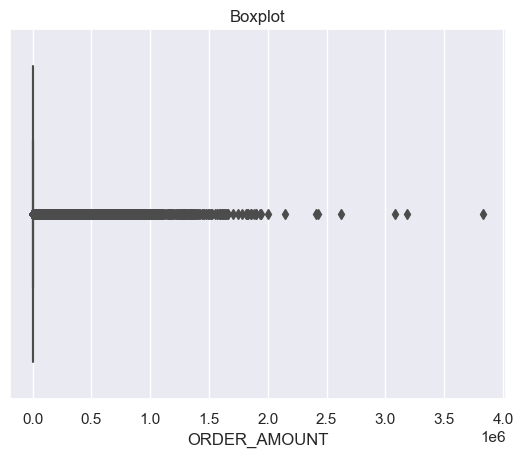

In [207]:
sns.boxplot(x=df['amount_in_usd'])
plt.title('Boxplot')
plt.xlabel('ORDER_AMOUNT')
plt.show()

In [208]:
q1_usd=df['amount_in_usd'].describe()['25%']
q3_usd=df['amount_in_usd'].describe()['75%']
iqr_usd=q3-q1                #finding Interquartile Range
print(iqr.round(3))

794.203


In [209]:
lower_usd=q1_usd-1.5*iqr
upper_usd=q3_usd+1.5*iqr

In [210]:
outliers_usd = df["amount_in_usd"][(df["amount_in_usd"] < lower_usd) | (df["amount_in_usd"] > upper_usd)]
print("Number of outliers:", len(outliers_usd)) 

Number of outliers: 95148


In [211]:
outliers_usd.head()

2      82342.0212
8      10224.4418
31      1997.8110
34      2833.5476
59    575221.9114
Name: amount_in_usd, dtype: float64

In [212]:
df = df.drop(outliers_usd.index).reset_index(drop=True)

In [213]:
df['amount_in_usd']

0         1164.6242
1          960.5792
2         1714.7588
3            0.0000
4         1299.7026
            ...    
956203     201.1644
956204     298.1480
956205    1118.0208
956206    1183.1528
956207     983.1284
Name: amount_in_usd, Length: 956208, dtype: float64

In [214]:
df.shape

(956208, 18)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956208 entries, 0 to 956207
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CUSTOMER_ORDER_ID        956208 non-null  int64         
 1   SALES_ORG                956208 non-null  int64         
 2   DISTRIBUTION_CHANNEL     956208 non-null  int32         
 3   DIVISION                 956208 non-null  int32         
 4   RELEASED_CREDIT_VALUE    956208 non-null  object        
 5   PURCHASE_ORDER_TYPE      956208 non-null  int32         
 6   COMPANY_CODE             956208 non-null  int64         
 7   ORDER_CREATION_DATE      956208 non-null  datetime64[ns]
 8   ORDER_CREATION_TIME      956208 non-null  int64         
 9   CREDIT_CONTROL_AREA      956208 non-null  int32         
 10  SOLD_TO_PARTY            956208 non-null  int64         
 11  REQUESTED_DELIVERY_DATE  956208 non-null  datetime64[ns]
 12  ORDER_CURRENCY  

In [216]:
df = df.drop(df[df['RELEASED_CREDIT_VALUE'] == '200.42.'].index)

In [217]:
df['RELEASED_CREDIT_VALUE']=df['RELEASED_CREDIT_VALUE'].astype(float)

In [218]:
def create_more_lags(df, lags, ffday, customer_id_col, create_date_col, net_amount_col):
    for i in range(ffday, lags+1):
        df['Last-'+str(i)+' day Sales'] = df.groupby([customer_id_col])[net_amount_col].shift(i)
    df = df.reset_index(drop=True)

    for i in range(ffday, lags+1):
        df['Last-'+str(i)+'day_Diff'] = df.groupby([customer_id_col])['Last-'+str(i)+' day_Sales'].diff()
    
    df.fillna(0, inplace=True)
    
    return df

In [219]:
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = pd.to_datetime(fld, infer_datetime_format=True)
    
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
        df[n] = getattr(fld.dt, n.lower())
    
    if drop:
        df.drop(fldname, axis=1, inplace=True)
    
    return df


In [220]:
lags = 3
ffday = 0
customer_id_col = 'CUSTOMER_NUMBER'
create_date_col = 'ORDER_CREATION_DATE'
net_amount_col = 'amount_in_usd'
df = create_more_lags(df, lags, ffday, customer_id_col, create_date_col, net_amount_col)

# Apply add_datepart function
date_column = 'ORDER_CREATION_DATE'
df = add_datepart(df, date_column)

KeyError: 'Column not found: Last-0 day_Sales'

In [ ]:
df.nunique()